# Iris Flower Dataset Analysis and Machine Learning 
## By Michał Olejek 
### 29.04.2020

In [6]:
#import libraries we will use
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
#Machine Learning libraries - We will use sklearn here
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

%matplotlib inline

## Data Analysis and analiza visualisation

##### Loading Data

First of all we have to read our dataset / Na początku musimy wczytać nasze dane do programu

We have to ways to do this:

    1) reading a csv file (if you have)
    2) using sklearn datasets (it is good for training only)

In [9]:
#using pandas module
dataset = pd.read_csv('iris.csv') #you have to have file with dataset and code in the same folder

In [8]:
#Using sklearmn function load_iris()
from sklearn.datasets import load_iris
dataset = load_iris()

Before start an analize, I would like to seek missing values, we can use command from numpy called 'isna'

In [11]:
dataset = pd.read_csv('iris.csv')
miss = np.sum(dataset.isna())
print(miss)
print('')

sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64



When we are calm becasue nothing is missing we can continue analize

In [12]:
dataset = pd.read_csv('iris.csv') # this analize is for csv file
#We have to calculate mean, median, STD / Musimy obliczyć medianę, średnią, odchylenie standardowe
srednia = dataset.mean(axis = 0)
mediana = dataset.median(axis = 0)
stdd = dataset.std(axis = 0)
#Let's count how many flowers we have / Obliczmy ile jest kwiatów z danych gatunków
zliczenie = dataset["variety"].value_counts()
#'Prints'
print(dataset) #dataset print
print("")
#print mean, median, STD
print("Mean: ")
print(srednia)
print("Median: ")
print(mediana)
print("STD: ")
print(stdd)
print("")
print(zliczenie)
#Knowladge of correlation will be very useful / Poznanie współczynika korelacji na pewno będzie użyteczne
corr_matrix = dataset.corr()
corr_matrix['sepal.width'].sort_values(ascending = False)

     sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

Mean: 
sepal.length    5.843333
sepal.width     3.057333
petal.length    3.758000
petal.width     1.199333
dtype: float64
Median: 
sepal.length    

sepal.width     1.000000
sepal.length   -0.117570
petal.width    -0.366126
petal.length   -0.428440
Name: sepal.width, dtype: float64

Now we cpuld see that the most correlated classes are petal lenght and petal width it will be very helpful to make ours machine learning model, but now we should look at data visualizations

### Plots / Wykresy

Plots are very useful in next analize. When you have good plots you can see more information about your data so visualization is really important 

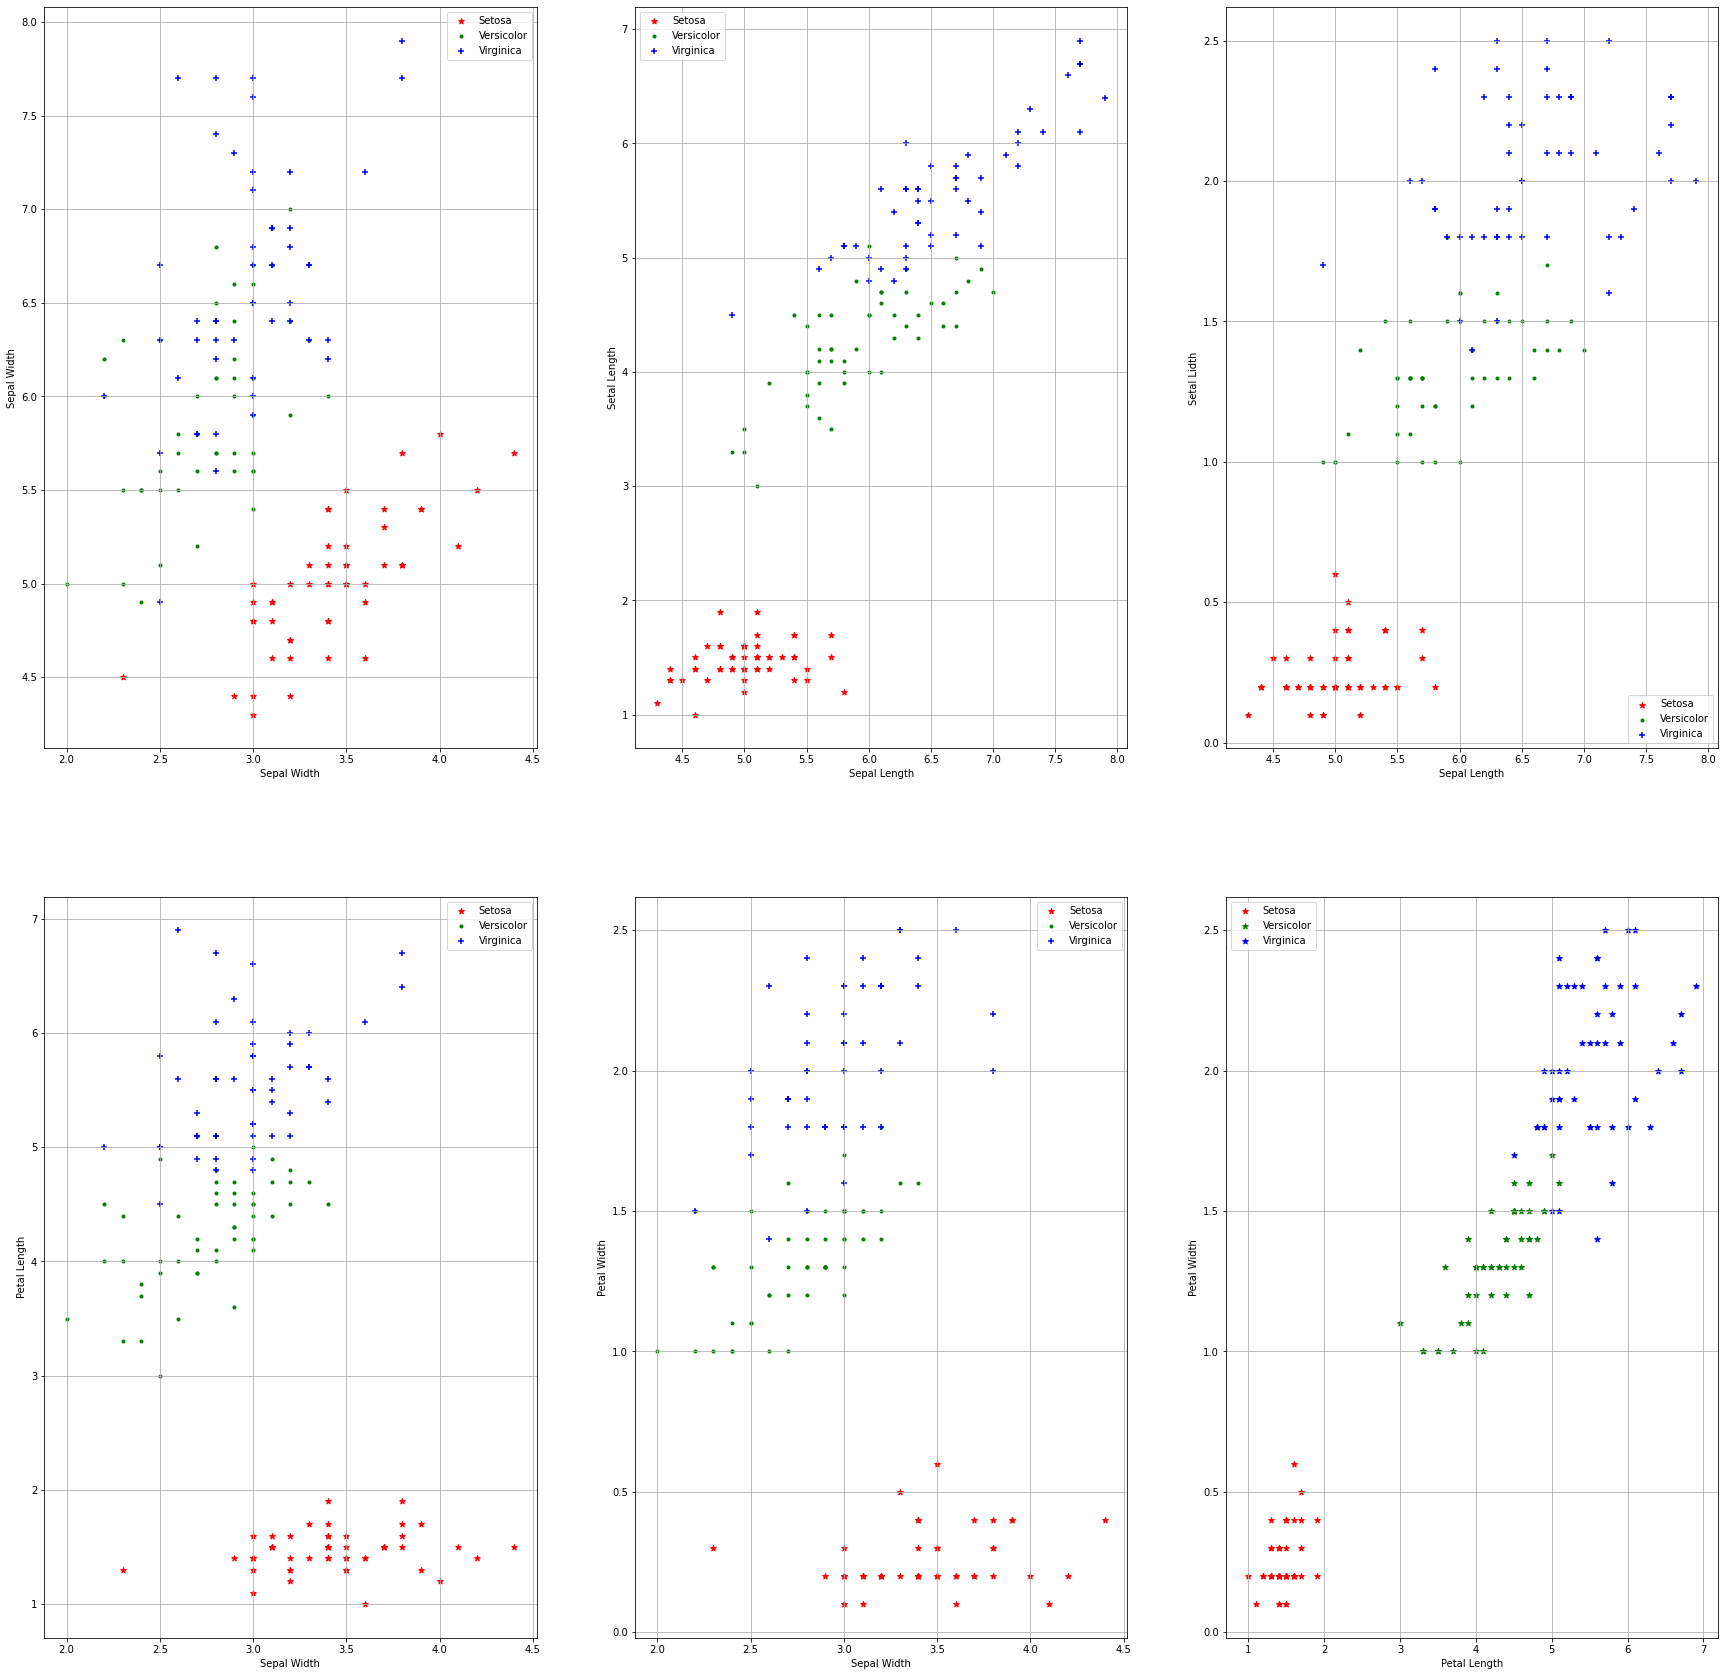

In [13]:
fig, axs = plt.subplots(2, 3, figsize = (30, 30))

wyk1 = dataset[dataset.variety == dataset.variety.unique()[0]]
wyk2 = dataset[dataset.variety == dataset.variety.unique()[1]]
wyk3 = dataset[dataset.variety == dataset.variety.unique()[2]]
        
    
axs[0,0].scatter(wyk1["sepal.width"],wyk1["sepal.length"], c = "red", label = "Setosa" , marker = '*')
axs[0,0].scatter(wyk2["sepal.width"],wyk2["sepal.length"], c = "green", label = "Versicolor", marker = '.')
axs[0,0].scatter(wyk3["sepal.width"],wyk3["sepal.length"], c = "blue", label = "Virginica", marker = '+')

axs[0,0].set_xlabel("Sepal Width")
axs[0,0].set_ylabel("Sepal Width")


axs[0,1].scatter(wyk1["sepal.length"], wyk1["petal.length"], c = "red", label = "Setosa" , marker = '*')
axs[0,1].scatter(wyk2["sepal.length"], wyk2["petal.length"], c = "green", label = "Versicolor", marker = '.')
axs[0,1].scatter(wyk3["sepal.length"], wyk3["petal.length"], c = "blue", label = "Virginica", marker = '+')

axs[0,1].set_xlabel("Sepal Length")
axs[0,1].set_ylabel("Setal Length")


axs[0,2].scatter(wyk1["sepal.length"], wyk1["petal.width"], c = "red", label = "Setosa" , marker = '*')
axs[0,2].scatter(wyk2["sepal.length"], wyk2["petal.width"], c = "green", label = "Versicolor", marker = '.')
axs[0,2].scatter(wyk3["sepal.length"], wyk3["petal.width"], c = "blue", label = "Virginica", marker = '+')

axs[0,2].set_xlabel("Sepal Length")
axs[0,2].set_ylabel("Setal Lidth")

axs[1,0].scatter(wyk1["sepal.width"], wyk1["petal.length"], c = "red", label = "Setosa" , marker = '*')
axs[1,0].scatter(wyk2["sepal.width"], wyk2["petal.length"], c = "green", label = "Versicolor", marker = '.')
axs[1,0].scatter(wyk3["sepal.width"], wyk3["petal.length"], c = "blue", label = "Virginica", marker = '+')

axs[1,0].set_xlabel("Sepal Width")
axs[1,0].set_ylabel("Petal Length")


axs[1,1].scatter(wyk1["sepal.width"], wyk1["petal.width"], c = "red", label = "Setosa" , marker = '*')
axs[1,1].scatter(wyk2["sepal.width"], wyk2["petal.width"], c = "green", label = "Versicolor", marker = '.')
axs[1,1].scatter(wyk3["sepal.width"], wyk3["petal.width"], c = "blue", label = "Virginica", marker = '+')

axs[1,1].set_xlabel("Sepal Width")
axs[1,1].set_ylabel("Petal Width")


axs[1,2].scatter(wyk1["petal.length"], wyk1["petal.width"], c = "red", label = "Setosa" , marker = '*')
axs[1,2].scatter(wyk2["petal.length"], wyk2["petal.width"], c = "green", label = "Versicolor", marker = '*')
axs[1,2].scatter(wyk3["petal.length"], wyk3["petal.width"], c = "blue", label = "Virginica", marker = '*')

axs[1,2].set_xlabel("Petal Length")
axs[1,2].set_ylabel("Petal Width")

for i in range(0,2):
    for j in range(0,3):
        axs[i,j].grid(True)
        axs[i,j].legend(loc="best")
        
axs[0,0].legend(loc="upper right")
axs[0,2].legend(loc="lower right")
        
plt.show()

### Histograms

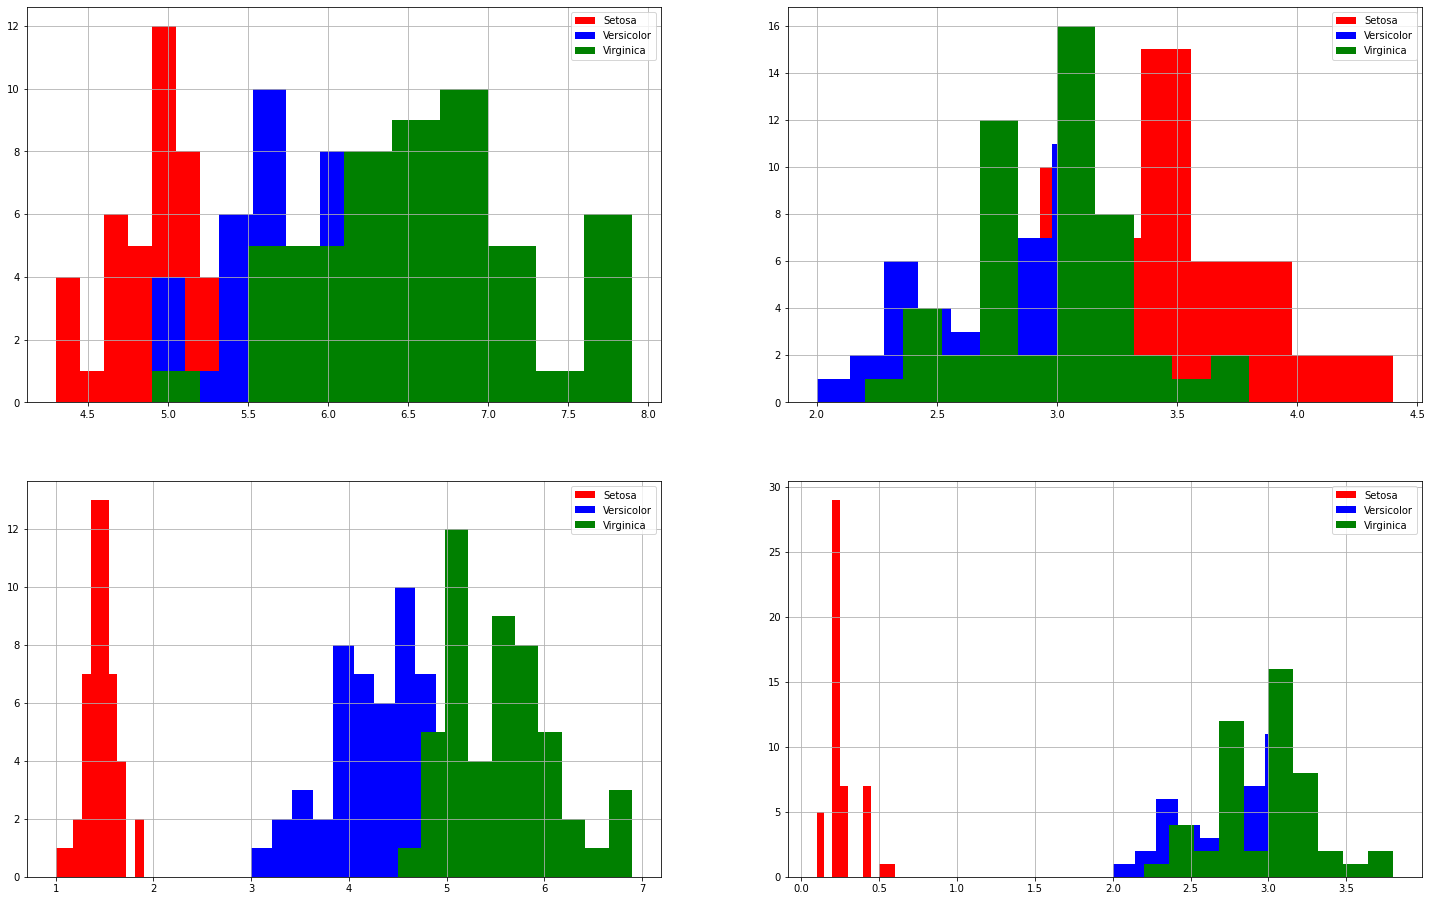

In [14]:
#Wczytanie 
#dataset = pd.read_csv('iris.csv')

fig, axs = plt.subplots(2, 2, figsize = (25, 16))

setosa = dataset[dataset["variety"] == "Setosa"]
versic = dataset[dataset["variety"] == "Versicolor"]
virgin = dataset[dataset["variety"] == "Virginica"]

#Wygenerowanie histogramów

#Sepal_length
axs[0][0].hist(setosa["sepal.length"], color = "red", label = "Setosa")
axs[0][0].hist(versic["sepal.length"], color = "blue", label = "Versicolor")
axs[0][0].hist(virgin["sepal.length"], color = "green", label = "Virginica")
axs[0][0].grid()
axs[0][0].legend()
#Sepal_Width
axs[0][1].hist(setosa["sepal.width"], color = "red", label = "Setosa")
axs[0][1].hist(versic["sepal.width"], color = "blue", label = "Versicolor")
axs[0][1].hist(virgin["sepal.width"], color = "green", label = "Virginica")
axs[0][1].grid()
axs[0][1].legend()
#Petal_Lenght
axs[1][0].hist(setosa["petal.length"], color = "red", label = "Setosa")
axs[1][0].hist(versic["petal.length"], color = "blue", label = "Versicolor")
axs[1][0].hist(virgin["petal.length"], color = "green", label = "Virginica")
axs[1][0].grid()
axs[1][0].legend()
#Petal_Width
axs[1][1].hist(setosa["petal.width"], color = "red", label = "Setosa")
axs[1][1].hist(versic["sepal.width"], color = "blue", label = "Versicolor")
axs[1][1].hist(virgin["sepal.width"], color = "green", label = "Virginica")
axs[1][1].grid()
axs[1][1].legend()



After visualizations we can see plots simlar to linear dependences so we can use linear regression but...

## Train and test data set

### We will make sets of train data and test data to start "teaching" model
|
I will define a function to split test and train set but sklearn.moedel_selection have this function so if you want, you can just import this module and use test_train_split


In [15]:
random.seed(42) #42 - magic number! 

def split_train_test(data, test_ratio): 
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

#I will split 30% of dataset as test data

train_set, test_set = split_train_test(dataset, 0.3)
print("Learing:", len(train_set), ", Test:", len(test_set))

Learing: 105 , Test: 45


But if you want you can use ready function from sklearn, in my opion it is very confortable

In [16]:
X_train, X_test, y_train, y_test = train_test_split(dataset['petal.length'], dataset['petal.width'], test_size = 0.3, random_state = 42)

OK but linear regression model expect 2D array - we have to make small transormation

In [17]:
X_train = X_train[:, np.newaxis]
X_test = X_test[:, np.newaxis]
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]


Now we can make our linear regression model using sklearn fucntion 

In [18]:
lr = linear_model.LinearRegression() #making model
lr.fit(X_train, y_train) #training model
#it is very simple, isn't it?

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#When we train our model let's make predictions 
pred = lr.predict(X_test)
print(pred)
print("")

[[1.58188752]
 [0.3419958 ]
 [2.49114145]
 [1.49922807]
 [1.62321724]
 [0.25933635]
 [1.12726056]
 [1.74720642]
 [1.49922807]
 [1.25124973]
 [1.74720642]
 [0.21800663]
 [0.1766769 ]
 [0.25933635]
 [0.25933635]
 [1.58188752]
 [2.03651448]
 [1.25124973]
 [1.49922807]
 [1.95385504]
 [0.30066608]
 [1.66454697]
 [0.30066608]
 [1.95385504]
 [2.28449283]
 [1.78853614]
 [2.03651448]
 [2.07784421]
 [0.21800663]
 [0.30066608]
 [0.05268773]
 [0.25933635]
 [1.45789835]
 [0.30066608]
 [0.1766769 ]
 [1.70587669]
 [1.49922807]
 [0.25933635]
 [0.21800663]
 [0.25933635]
 [1.74720642]
 [1.49922807]
 [1.58188752]
 [0.1766769 ]
 [0.25933635]]



In [20]:
#Now I will check the MSE - mean square error
err = mean_squared_error(y_test, pred)
print("MSE: ")
print(err)


MSE: 
0.03528545372428444


before LR:



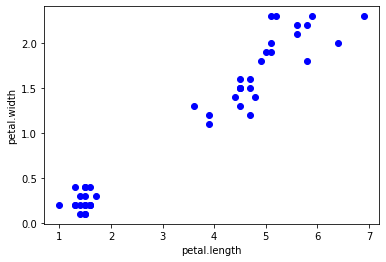


After:


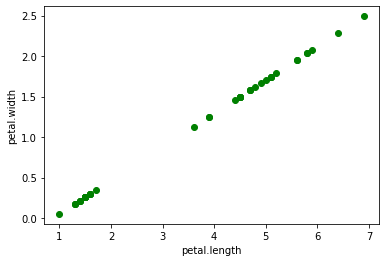

In [22]:
#Another time for visualization
print("before LR:")
plt.figure()
plt.scatter(X_test, y_test, color="blue")
plt.xlabel("petal.length")
plt.ylabel("petal.width")
print("")
plt.show()

print("")
plt.figure()
plt.scatter(X_test, pred, color = "green")
plt.xlabel("petal.length")
plt.ylabel("petal.width")
print("After:")
plt.show()

### Practical use of ML

Everyone want to write code that works and that can be usefull, so now we going to do this.


Our task is to classify flower using dimensions of an Iris. I choose to this task KNN model

.

#### K nearest neighbours 

What is this and how it works?

It is kind of non-parametric classification regression, it means this algorythm will forecasting some variables.

How KNN works?


![k-nearest-neighbor-algorithm-for-machine-learning2.png](attachment:k-nearest-neighbor-algorithm-for-machine-learning2.png)

source: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.javatpoint.com%2Fk-nearest-neighbor-algorithm-for-machine-learning&psig=AOvVaw2qVcCBG50xTR8NL4kuqJif&ust=1588660162115000&source=images&cd=vfe&ved=0CAIQjRxqFwoTCIic8LLlmekCFQAAAAAdAAAAABAD


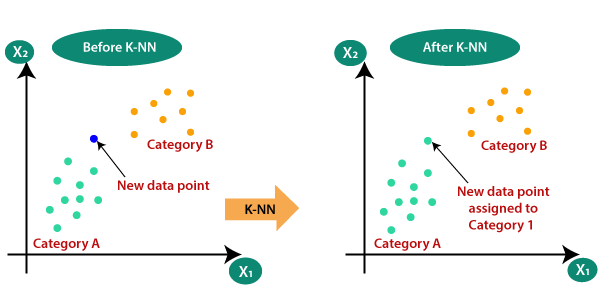

In [34]:
dataset = load_iris() #now we will import data from function becouse it is in array
print("Target: {}".format(dataset['target_names']))
print("Feature: {}".format(dataset['feature_names']))
print("Data Type: {}".format(type(dataset['data'])))
print("Data shape: {}".format(dataset['data'].shape))

Target: ['setosa' 'versicolor' 'virginica']
Feature: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data Type: <class 'numpy.ndarray'>
Data shape: (150, 4)


In [35]:
#Split data one more time but a little bit diffrent way
Xtrain, Xtest, ytrain, ytest = train_test_split(dataset['data'], dataset['target'], random_state=0)

In [36]:
knn = KNeighborsClassifier(n_neighbors=1) #it's really simple, isn't it?

In [37]:
#Now we going to train our new KNN model!
knn.fit(Xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

So let's make some predictions using our model!

We have an iris flower with this params:

sepal lenght - 4,3 cm
sepal width - 1,8 cm
petal lenght - 0,8 cm
petal width - 0,15 cm


In [38]:
#making an array with new data

flower = np.array([[3, 5, 2, 4]]) #flower = np.array([[sepallenght, sepalwidth, petallenght, petalwidth]])
flowershape = format(flower.shape)

print("Flower's params: ")
print(flower)
print("array shape: ")
print(flowershape)


Flower's params: 
[[3 5 2 4]]
array shape: 
(1, 4)


In [39]:
forecast = knn.predict(flower) #making prediction
print(forecast) #lets see our prediction


[0]


The output is "0" (zero), for me it dosen't make sense so now we should write code to interpret output

In [40]:
classify = format(dataset['target_names'][forecast])
#See the score
print(classify)

['setosa']


Now is time to see score of our model and meansure it

In [46]:
yscoretest = knn.predict(Xtest)

scoreofy = format(yscoretest)
scoreknn = format(np.mean(yscoretest == ytest))

print(scoreknn) #print score of knn model

0.9736842105263158


97,36% - it is very nice

Now try to yourself to classify feigned iris and have fun!